Показатель сходимости для метода прямоугольников pR =  3.663494134173348
Показатель сходимости для метода Симпсона pS =  2.9726998574742995
Показатель сходимости для метода Гаусса pG =  1.956626719381868


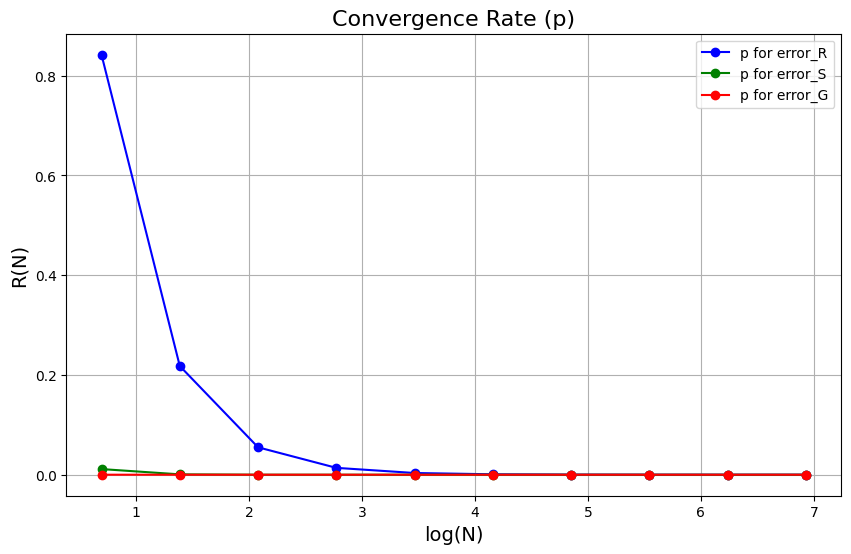

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filename = "output.txt" 

#data = pd.read_csv(filename, delim_whitespace=True)
file_path = 'output.txt'  
data = pd.read_csv(file_path, sep='\s+', header=0, names=['N', 'error_R', 'error_S', 'error_G'])
N       = data['N']
error_R = data['error_R'] 
error_S = data['error_S']
error_G = data['error_G']

#data.head()


def calculate_p(errors, N):
    p = []
    for i in range(1, len(errors)):
        
        error_i = errors[i] if errors[i] > 1e-10 else 1e-10
        error_prev = errors[i - 1] if errors[i - 1] > 1e-10 else 1e-10

        numerator = np.log(error_prev) - np.log(error_i)
        denominator = np.log(N[i]) - np.log(N[i - 1])

        p_i = numerator / denominator
        
        p.append(p_i)
    return p



pR = calculate_p(data['error_R'].values, data['N'].values)
pS = calculate_p(data['error_S'].values, data['N'].values)
pG = calculate_p(data['error_G'].values, data['N'].values)

print("Показатель сходимости для метода прямоугольников pR = ", np.mean(pR))
print("Показатель сходимости для метода Симпсона pS = ", np.mean(pS))
print("Показатель сходимости для метода Гаусса pG = ", np.mean(pG))


log_N_values = np.log(data['N'].values[1:])

plt.figure(figsize=(10, 6))
plt.plot(np.log(N.values), error_R.values, label='p for error_R', marker='o', linestyle='-', color='b')
plt.plot(np.log(N.values), error_S.values,label='p for error_S', marker='o', linestyle='-', color='g')
plt.plot(np.log(N.values), error_G.values, label='p for error_G', marker='o', linestyle='-', color='r')

plt.xlabel('log(N)', fontsize=14)
plt.ylabel('R(N)', fontsize=14)
#plt.xscale('log') 
plt.title('Convergence Rate (p)', fontsize=16)
plt.legend()

plt.grid(True)
plt.show()